# <center>__MODULE 1:__ </center>
# <center>__PREPROCESSING__ </center>
***
## **1. Data Acquisition**


- ### **1.1** Importing and displaying dataframe
***

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
import warnings
warnings.filterwarnings('ignore')


df_og = pd.read_json('electronics.json', encoding = 'utf-8')
df_og.head(5)

Customer_ID Age  Gender Income_Level  \
0  b81ee6c9-2ae4-48a7-b283-220eaa244f43  40  Female       Medium   
1                                        25    Male         High   
2  fdf79bcd-5908-4c90-8501-570ffb5b7648  57   Other          Low   
3  878dccba-893a-48f9-8d34-6ed394fa3c9c  38  Female       Medium   
4  0af0bd81-73cc-494e-aa5e-75c6d0b6d743  68   Other       Medium   

                                             Address  \
0  43548 Murray Islands Suite 974\nAmyberg, CT 13457   
1                                                      
2     79683 Kevin Hill Apt. 555\nJohnshire, AR 39961   
3  02998 Hall Meadows Suite 809\nNorth Robertvill...   
4  21411 Timothy Ford Apt. 320\nDavisborough, AR ...   

                         Transaction_ID Purchase_Date  \
0  c6a6c712-e36b-406a-bfde-f53bdcf4744f    2022-04-26   
1  0b587838-1e4f-4231-b488-42bcd47c052a    2021-08-10   
2  462925b1-a5bf-4996-bda2-59749de64eea    2021-12-09   
3  3cfafa02-6b34-4d77-9e05-d223dfab64e8    2022-12-03   
4  0d8dc27a-0c8f-4a82-b57e-8bf54cee9759    2020-06-08   

                             Product_ID Product_Category    Brand  \
0  d2f767d6-b01a-41a2-87f7-ec1d1186f50e         Clothing  Brand_C   
1  79eadc55-2de1-41cf-b1b6-40118c0bf8ec            Books  Brand_A   
2  9ab75a68-4329-4bd9-a259-2233c0f34c93      Electronics  Brand_A   
3  d518569b-ff79-494b-b2b6-7e2af39db86a         Clothing  Brand_C   
4  b6deac9d-2b7e-4a51-8273-a6534910b3bc            Books  Brand_B   

  Purchase_Amount Average_Spending_Per_Purchase Purchase_Frequency_Per_Month  \
0             193                            59                            2   
1             318                            77                            2   
2             197                           100                            9   
3             262                            97                            3   
4             429                            85                            7   

  Brand_Affinity_Score Product_Category_Preferences Month  Year  Season  \
0                    2                          Low    01  2010  Winter   
1                    1                          Low    08  1989    Fall   
2                    1                          Low        1995  Winter   
3                    4                          Low    09  2012    Fall   
4                    2                         High    01  2010  Summer   

   Will_Purchase_Next_Month  
0                         1  
1                         1  
2                         1  
3                         1  
4                         1

> #### Thoughts: Data ranging through all categories is present. Task is concerned only with Electronics department.
***
### 1.1.1 Extracting relevant data ###

In [9]:
df = df_og[df_og['Product_Category'] == 'Electronics'].copy()

df.reset_index(drop=True, inplace=True) # Resetting the indices to start from 0
df.head(5)

Customer_ID Age  Gender Income_Level  \
0  fdf79bcd-5908-4c90-8501-570ffb5b7648  57   Other          Low   
1  2e74b84d-d06c-4920-a3a9-38e4a11e8da8  54    Male         High   
2  309ab6ee-9364-4a64-9785-77717415ed5f  22    Male         High   
3  ffb65cd7-4329-4abb-b076-05eb7cf933e0  68  Female                
4  34f7ac8d-fd91-4813-bf4d-e7b18264e442  73  Female         High   

                                             Address  \
0     79683 Kevin Hill Apt. 555\nJohnshire, AR 39961   
1    8072 Dean Bypass Suite 774\nChloebury, AL 01960   
2  80014 Ayers Extension Apt. 361\nSmithtown, WY ...   
3       7417 Gregory Garden\nJordanborough, MT 88106   
4     12604 Mcdowell Canyon\nNew Angelview, TN 16808   

                         Transaction_ID Purchase_Date  \
0  462925b1-a5bf-4996-bda2-59749de64eea    2021-12-09   
1  4c45da65-bd62-486e-aeff-31f8959e0987    2023-06-03   
2  62001db5-24fa-49d8-b570-928124a181d9    2022-01-07   
3  27a18611-855f-4db3-ad4e-77b008695f09    2022-06-25   
4  b6c5589a-483a-403f-9cf2-b0ae77b15fbf    2021-11-27   

                             Product_ID Product_Category    Brand  \
0  9ab75a68-4329-4bd9-a259-2233c0f34c93      Electronics  Brand_A   
1  e47f58c8-c6e9-40ed-9ce8-31af73b91fb5      Electronics  Brand_B   
2  b66cae99-a5b0-4ca9-9aff-6f57ff1bf421      Electronics            
3                                            Electronics  Brand_B   
4  70729d29-d37a-4bda-9081-c49d9dd47f30      Electronics  Brand_C   

  Purchase_Amount Average_Spending_Per_Purchase Purchase_Frequency_Per_Month  \
0             197                           100                            9   
1             272                            18                           10   
2             241                            26                            8   
3             115                            31                            4   
4             370                            13                            2   

  Brand_Affinity_Score Product_Category_Preferences Month  Year  Season  \
0                    1                          Low        1995  Winter   
1                    3                       Medium    04  2019  Winter   
2                    5                       Hidden    09  1978  Summer   
3                    4                          Low    10  1972  Summer   
4                    8                         High    05  1991  Summer   

   Will_Purchase_Next_Month  
0                         1  
1                         1  
2                         1  
3                         1  
4                         1

> #### **Decision: Task concerns only the electronics section. Rest of the dataframe is discarded.**
***
- ### **1.2** Checking dtypes and null values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Customer_ID                    355 non-null    object
 1   Age                            355 non-null    object
 2   Gender                         355 non-null    object
 3   Income_Level                   355 non-null    object
 4   Address                        355 non-null    object
 5   Transaction_ID                 355 non-null    object
 6   Purchase_Date                  355 non-null    object
 7   Product_ID                     355 non-null    object
 8   Product_Category               355 non-null    object
 9   Brand                          355 non-null    object
 10  Purchase_Amount                355 non-null    object
 11  Average_Spending_Per_Purchase  355 non-null    object
 12  Purchase_Frequency_Per_Month   355 non-null    object
 13  Brand

> #### Thoughts: Datatypes are not defined. Numeric columns must be converted to float values ####
***
- ### **1.3** Defining types and generalizing missing values 

In [13]:
# Creating a list of numeric and string-based columns for ease
numeric_columns = ['Purchase_Amount', 'Average_Spending_Per_Purchase', 'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score', 'Age', 'Month', 'Year', 'Will_Purchase_Next_Month']
string_columns = ['Address', 'Transaction_ID', 'Income_Level', 'Purchase_Date', 'Product_ID', 'Product_Category', 'Brand', 'Season', 'Customer_ID', 'Gender', 'Product_Category_Preferences']

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors = 'coerce')
df[string_columns] = df[string_columns].astype(str).replace("Hidden", "")
df[string_columns] = df[string_columns].astype(str).replace("", np.NaN)
df.dtypes

Customer_ID                       object
Age                              float64
Gender                            object
Income_Level                      object
Address                           object
Transaction_ID                    object
Purchase_Date                     object
Product_ID                        object
Product_Category                  object
Brand                             object
Purchase_Amount                  float64
Average_Spending_Per_Purchase    float64
Purchase_Frequency_Per_Month     float64
Brand_Affinity_Score             float64
Product_Category_Preferences      object
Month                            float64
Year                             float64
Season                            object
Will_Purchase_Next_Month           int64
dtype: object

> #### **Decisions:** 
> - #### **Converted the numeric columns to float64 dtype.** 
> - #### **Replaced empty strings with NaN values.** 
***
- ### **1.4** Checking column-wise null values


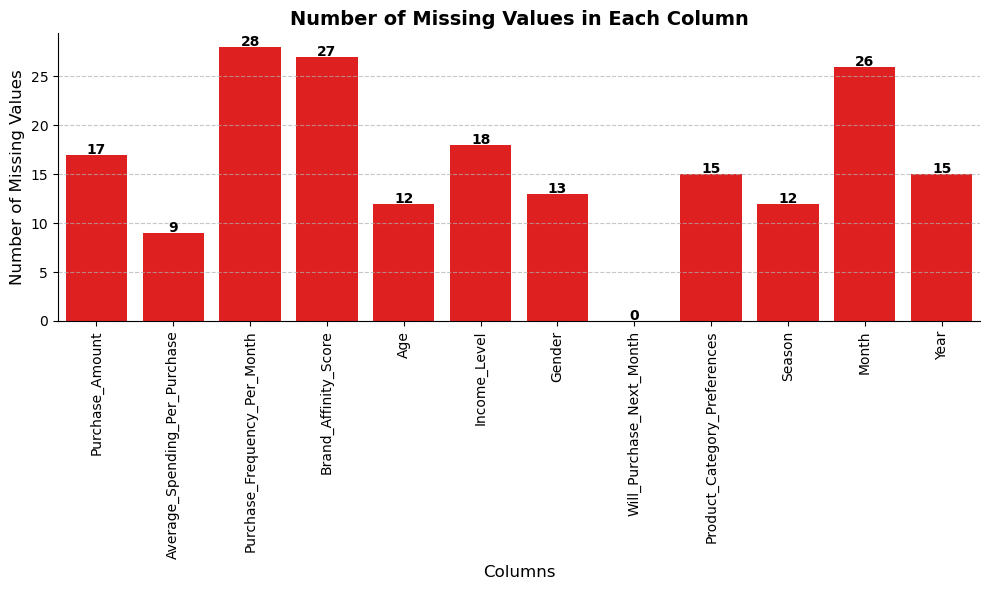

In [15]:
relevant_columns =  ['Purchase_Amount', 'Average_Spending_Per_Purchase', 'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score', 'Age', 'Income_Level', 'Gender', 'Will_Purchase_Next_Month', 'Product_Category_Preferences', 'Season', 'Month', 'Year']
missing_values = df[relevant_columns].isnull().sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, color='red')

plt.title('Number of Missing Values in Each Column', fontsize=14, weight='bold')
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Number of Missing Values', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

for i, value in enumerate(missing_values.values):
    plt.text(i, value + 0.1, f'{value}', ha='center', fontsize=10, weight='bold', color='black')

sns.despine()  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

> #### Thoughts: On average, 4% of data is missing in each column with the most missing column being only 8% missing. ####
>> #### **No need to drop columns on the basis of missingness.** ####
***
- ### **1.5** Checking row-wise null values


In [17]:
# Check is performed on relevant columns as the rest don't matter
row_missing = (df[relevant_columns].isnull().sum(axis = 1)) 
print(row_missing.describe())
print('Outliers =', len(row_missing[row_missing > 2]))

count    355.000000
mean       0.540845
std        0.685107
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
dtype: float64
Outliers = 5


> #### Thoughts: On average, there is a 54% chance for a row in the dataset to have one missing value distributed across various columns ####
>> #### **5 Outliers detected. Further processing is necessary** ####
***
- ### **1.5.1** Visualizing missing values.

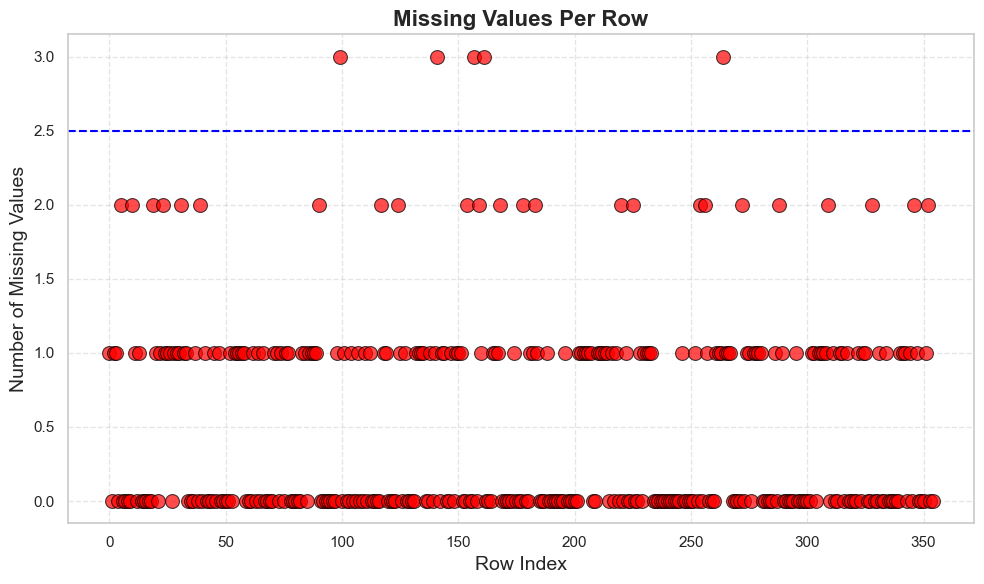

In [127]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=range(len(row_missing)), y=row_missing, alpha=0.7, color='red', s=100, edgecolor='black')

plt.title('Missing Values Per Row', fontsize=16, weight='bold')
plt.xlabel('Row Index', fontsize=14)
plt.ylabel('Number of Missing Values', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.5)
plt.axhline(y=2.5, color='blue', linestyle='--', label='Threshold')

# Show the plot
plt.tight_layout()
plt.show()

> #### **Decision: We can remove the entries with more than 2 missing values as they only constitute as only 1% of the total data** ####
***
## **2. Data Cleaning**
***

In [21]:
df = df[relevant_columns].copy() 
df.dropna(axis = 0, thresh = len(relevant_columns)-3, inplace = True) # Removed the 3 entries
df.head(5)

Purchase_Amount  Average_Spending_Per_Purchase  \
0            197.0                          100.0   
1            272.0                           18.0   
2            241.0                           26.0   
3            115.0                           31.0   
4            370.0                           13.0   

   Purchase_Frequency_Per_Month  Brand_Affinity_Score   Age Income_Level  \
0                           9.0                   1.0  57.0          Low   
1                          10.0                   3.0  54.0         High   
2                           8.0                   5.0  22.0         High   
3                           4.0                   4.0  68.0          NaN   
4                           2.0                   8.0  73.0         High   

   Gender  Will_Purchase_Next_Month Product_Category_Preferences  Season  \
0   Other                         1                          Low  Winter   
1    Male                         1                       Medium  Winter   
2    Male                         1                          NaN  Summer   
3  Female                         1                          Low  Summer   
4  Female                         1                         High  Summer   

   Month    Year  
0    NaN  1995.0  
1    4.0  2019.0  
2    9.0  1978.0  
3   10.0  1972.0  
4    5.0  1991.0

> #### Thoughts: The unnecessary columns such as product ID and what-not seemingly serve no predictive properties  ####
>> #### **Decisions:** 
>> - #### **Dropped the unnecessary columns.** 
>> - #### **Removed the 3 entries with more than 2 missing value.** 
***
- ### **2.1** Determining skewness and checking for outliers


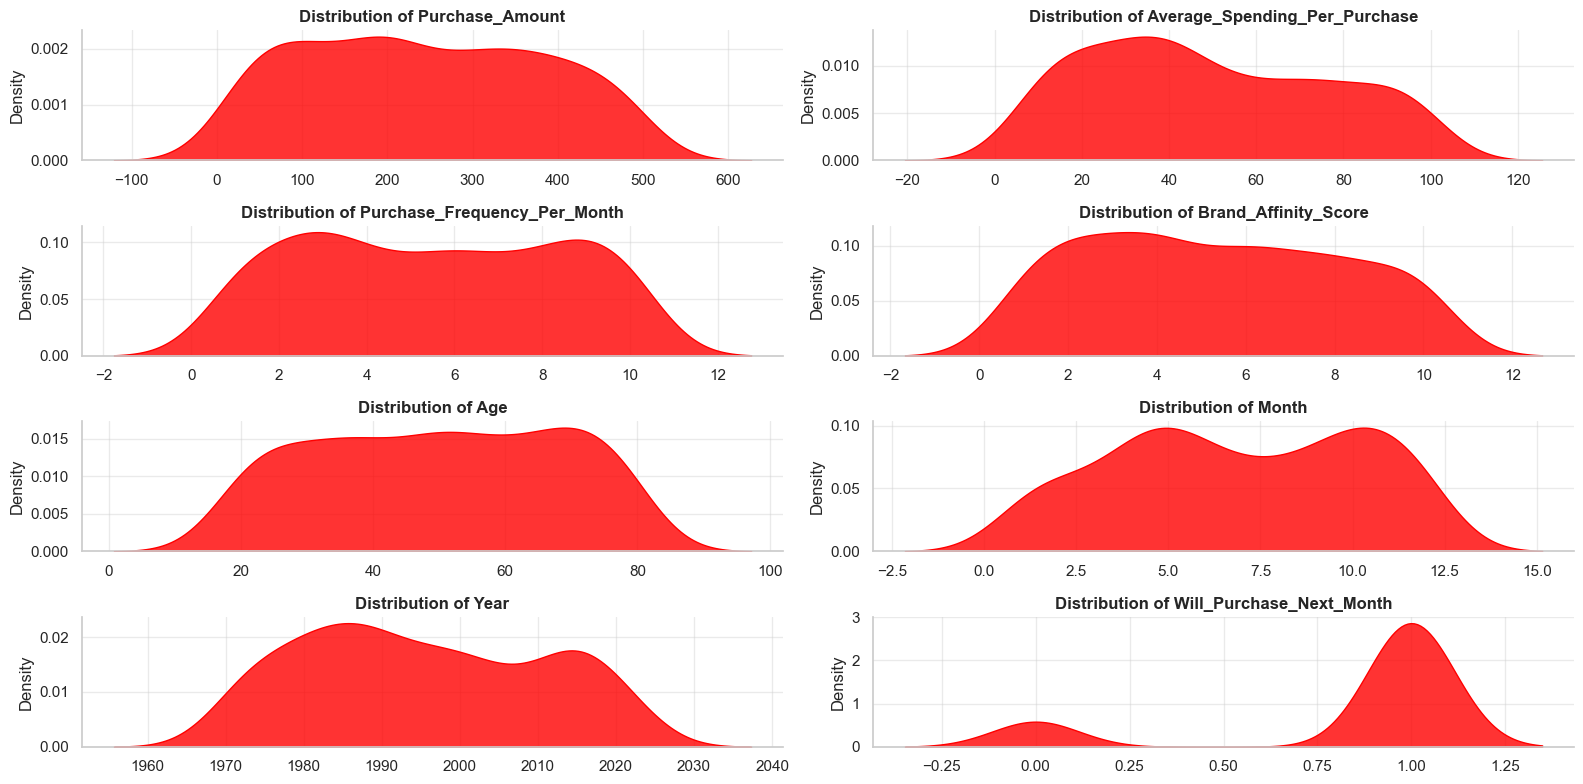

In [23]:
fig, axes = plt.subplots(4, 2, figsize=(16, 8))
axes = axes.flatten()  

for i, col in enumerate(numeric_columns):
    sns.kdeplot(data=df, x=col, fill=True, ax=axes[i], color="red", alpha=0.8)
    axes[i].set_title(f'Distribution of {col}', fontsize=12, weight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Density')
    axes[i].grid(alpha=0.4)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)

for j in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [24]:
df[numeric_columns].skew()

Purchase_Amount                  0.099266
Average_Spending_Per_Purchase    0.264051
Purchase_Frequency_Per_Month     0.027057
Brand_Affinity_Score             0.124134
Age                             -0.056220
Month                           -0.093514
Year                             0.151007
Will_Purchase_Next_Month        -1.773872
dtype: float64

> #### Thoughts:
> - #### The data shows normal distribution.
> - #### There are no extreme outliers with minimal skewness and kurtosis.
***
- ### **2.2** Imputing missing values. 


In [26]:
numeric_columns = ['Purchase_Amount', 'Average_Spending_Per_Purchase', 'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score', 'Age', 'Month', 'Year', 'Will_Purchase_Next_Month']
string_columns = ['Income_Level', 'Gender', 'Product_Category_Preferences', 'Season']

df[numeric_columns] = df[numeric_columns].apply(lambda x: x.fillna(x.mean()))
df[numeric_columns] = df[numeric_columns].astype('int64') # Removing decimal points.
df[string_columns] = df[string_columns].apply(lambda x: x.fillna(x.mode()[0]))

df.head()

Purchase_Amount  Average_Spending_Per_Purchase  \
0              197                            100   
1              272                             18   
2              241                             26   
3              115                             31   
4              370                             13   

   Purchase_Frequency_Per_Month  Brand_Affinity_Score  Age Income_Level  \
0                             9                     1   57          Low   
1                            10                     3   54         High   
2                             8                     5   22         High   
3                             4                     4   68       Medium   
4                             2                     8   73         High   

   Gender  Will_Purchase_Next_Month Product_Category_Preferences  Season  \
0   Other                         1                          Low  Winter   
1    Male                         1                       Medium  Winter   
2    Male                         1                       Medium  Summer   
3  Female                         1                          Low  Summer   
4  Female                         1                         High  Summer   

   Month  Year  
0      6  1995  
1      4  2019  
2      9  1978  
3     10  1972  
4      5  1991

> #### Thoughts: The number of missing values are relatively small and the distribution is normal.
>> #### **Decisions:** 
>> - #### **Filled each numeric value with the mean of respective column.**
>> - #### **Filled each string value with the mode of respective column.**
***
## **3. Data Transformation**
***

In [28]:
df['Average_Spending_Per_Month'] = df['Average_Spending_Per_Purchase'] * df['Purchase_Frequency_Per_Month']

numeric_columns.append('Income_Level')
numeric_columns.append('Product_Category_Preferences')
numeric_columns.append('Average_Spending_Per_Month')
encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])

# Fit and transform the data
df['Income_Level'] = encoder.fit_transform(df[['Income_Level']])
df['Product_Category_Preferences'] = encoder.fit_transform(df[['Product_Category_Preferences']])
df.head()

Purchase_Amount  Average_Spending_Per_Purchase  \
0              197                            100   
1              272                             18   
2              241                             26   
3              115                             31   
4              370                             13   

   Purchase_Frequency_Per_Month  Brand_Affinity_Score  Age  Income_Level  \
0                             9                     1   57           0.0   
1                            10                     3   54           2.0   
2                             8                     5   22           2.0   
3                             4                     4   68           1.0   
4                             2                     8   73           2.0   

   Gender  Will_Purchase_Next_Month  Product_Category_Preferences  Season  \
0   Other                         1                           0.0  Winter   
1    Male                         1                           1.0  Winter   
2    Male                         1                           1.0  Summer   
3  Female                         1                           0.0  Summer   
4  Female                         1                           2.0  Summer   

   Month  Year  Average_Spending_Per_Month  
0      6  1995                         900  
1      4  2019                         180  
2      9  1978                         208  
3     10  1972                         124  
4      5  1991                          26

> #### Thoughts: 
>> - #### Used Average Spending Per Purchase And Purchase Frequency Per Month to make a guess about average spending per month.
>> - #### Encoded the ordinal categorical variables.


# <div style="text-align: center; padding-top: 100px;"> __MODULE 2:__</div>
# <center>__EXPLORATORY DATA ANALYSIS:__ </center>
***
## **1. Univariate data analysis**
### **1.1** Descriptive statistics

In [31]:
key_df = df[numeric_columns]
key_df.describe()


Purchase_Amount  Average_Spending_Per_Purchase  \
count       355.000000                     355.000000   
mean        242.692958                      49.067606   
std         136.413416                      27.061678   
min          10.000000                       5.000000   
25%         124.500000                      26.500000   
50%         242.000000                      46.000000   
75%         354.500000                      72.000000   
max         496.000000                     100.000000   

       Purchase_Frequency_Per_Month  Brand_Affinity_Score         Age  \
count                    355.000000            355.000000  355.000000   
mean                       5.464789              5.290141   49.836620   
std                        2.812558              2.727303   18.110655   
min                        1.000000              1.000000   18.000000   
25%                        3.000000              3.000000   35.000000   
50%                        5.000000              5.000000   50.000000   
75%                        8.000000              7.500000   66.000000   
max                       10.000000             10.000000   80.000000   

            Month         Year  Will_Purchase_Next_Month  Income_Level  \
count  355.000000   355.000000                355.000000    355.000000   
mean     6.819718  1995.332394                  0.830986      1.005634   
std      3.225281    14.981795                  0.375293      0.777488   
min      1.000000  1970.000000                  0.000000      0.000000   
25%      4.000000  1983.000000                  1.000000      0.000000   
50%      6.000000  1995.000000                  1.000000      1.000000   
75%     10.000000  2008.000000                  1.000000      2.000000   
max     12.000000  2023.000000                  1.000000      2.000000   

       Product_Category_Preferences  Average_Spending_Per_Month  
count                    355.000000                  355.000000  
mean                       1.002817                  264.988732  
std                        0.786534                  210.504733  
min                        0.000000                    5.000000  
25%                        0.000000                  100.000000  
50%                        1.000000                  198.000000  
75%                        2.000000                  384.000000  
max                        2.000000                  990.000000

> #### Thoughts: The standard deviation for each entry attribute is rather high. 
***

In [33]:
key_df.skew()

Purchase_Amount                  0.102480
Average_Spending_Per_Purchase    0.267629
Purchase_Frequency_Per_Month     0.070317
Brand_Affinity_Score             0.155221
Age                             -0.052308
Month                           -0.037280
Year                             0.157221
Will_Purchase_Next_Month        -1.773872
Income_Level                    -0.009773
Product_Category_Preferences    -0.004967
Average_Spending_Per_Month       1.112310
dtype: float64

> #### Thoughts: Average spending per purchase, brand affinity, and year of purchase are slightly positively skewed. 
***

In [35]:
key_df.kurt()

Purchase_Amount                 -1.072124
Average_Spending_Per_Purchase   -1.062749
Purchase_Frequency_Per_Month    -1.153606
Brand_Affinity_Score            -1.026044
Age                             -1.153647
Month                           -1.064026
Year                            -1.087381
Will_Purchase_Next_Month         1.153087
Income_Level                    -1.342967
Product_Category_Preferences    -1.381487
Average_Spending_Per_Month       0.704067
dtype: float64

> #### Thoughts: The dataset is platykurtic. Lack of outliers with minimal tails. 
***
- ### **1.2** Histograms. 


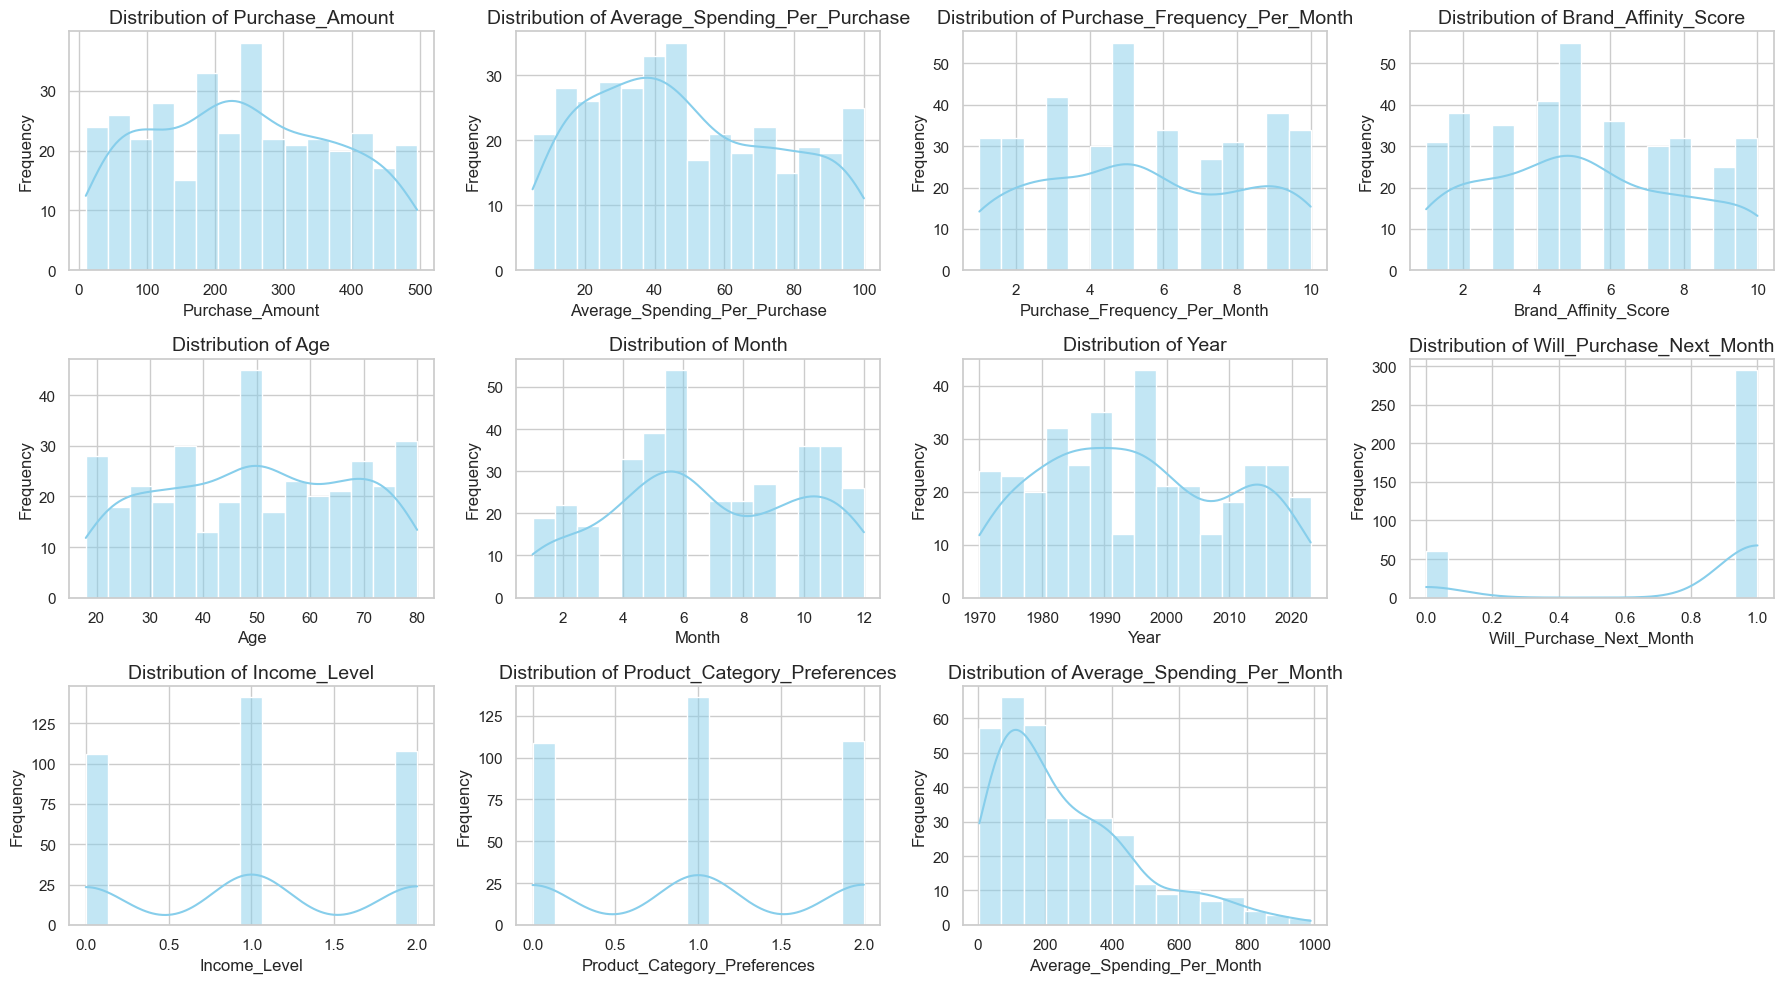

In [37]:

sns.set_style("whitegrid")
sns.set_palette("pastel")

# Create histograms
plt.figure(figsize=(18, 10))
for i, col in enumerate(key_df.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(key_df[col], kde=True, bins=15, color="skyblue")
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()


> #### Thoughts:
> - #### Average spending per purchase is more inclined to the lower end. This implies less of an inclination of customers to spend more money.
> - #### Average spending per month shows a similar trend.
> - #### Year of purchase is also inclined more towards the left. This implies a decrease of customers over time, as aforementioned in the task provided.
> - #### Majority of the purchases occur during the months of peak summer (4-6) and peak winter (10-11)
> - #### The rest of the attributes display normal distribution
***
- ### **1.3** Boxplots. 


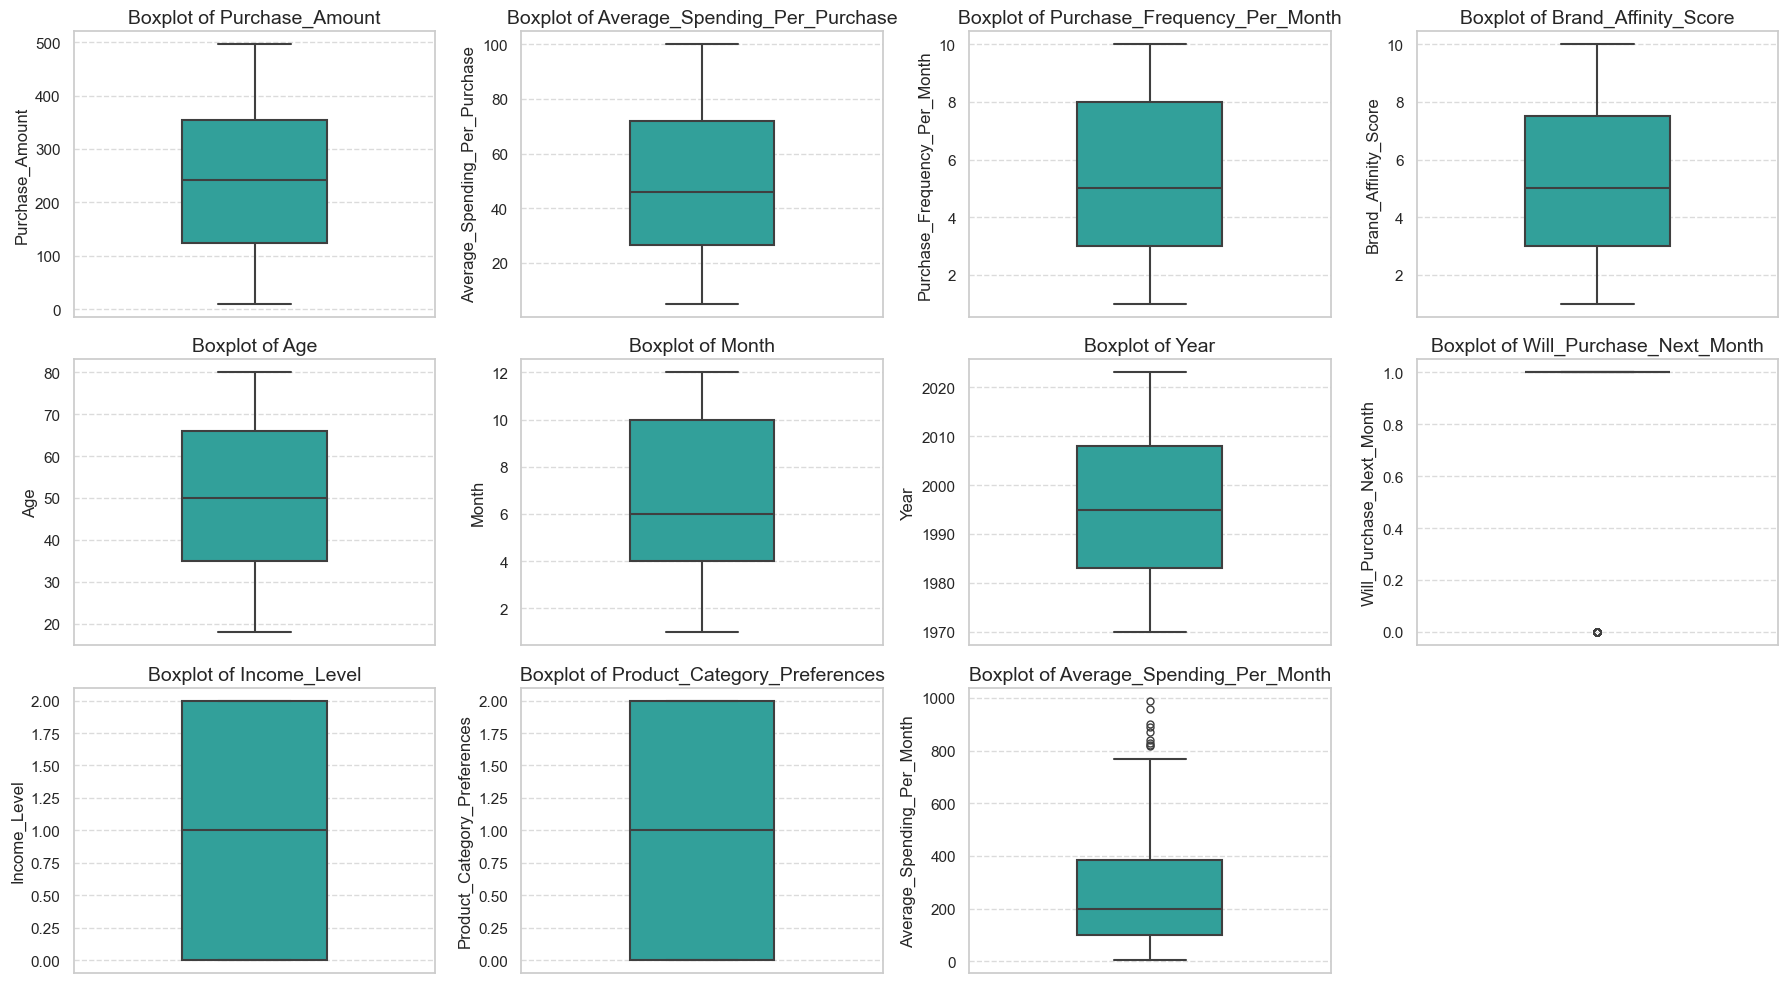

In [39]:
plt.figure(figsize=(18, 10))
for i, col in enumerate(key_df.columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=key_df[col], color="lightseagreen", width=0.4, fliersize=5, linewidth=1.5)
    plt.title(f"Boxplot of {col}", fontsize=14)
    plt.ylabel(col, fontsize=12)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()
plt.show()

> #### Thoughts: Many outliers found for average monthly spending.
***
## **2. Bivariate Analysis**
### **2.1** Heatmaps

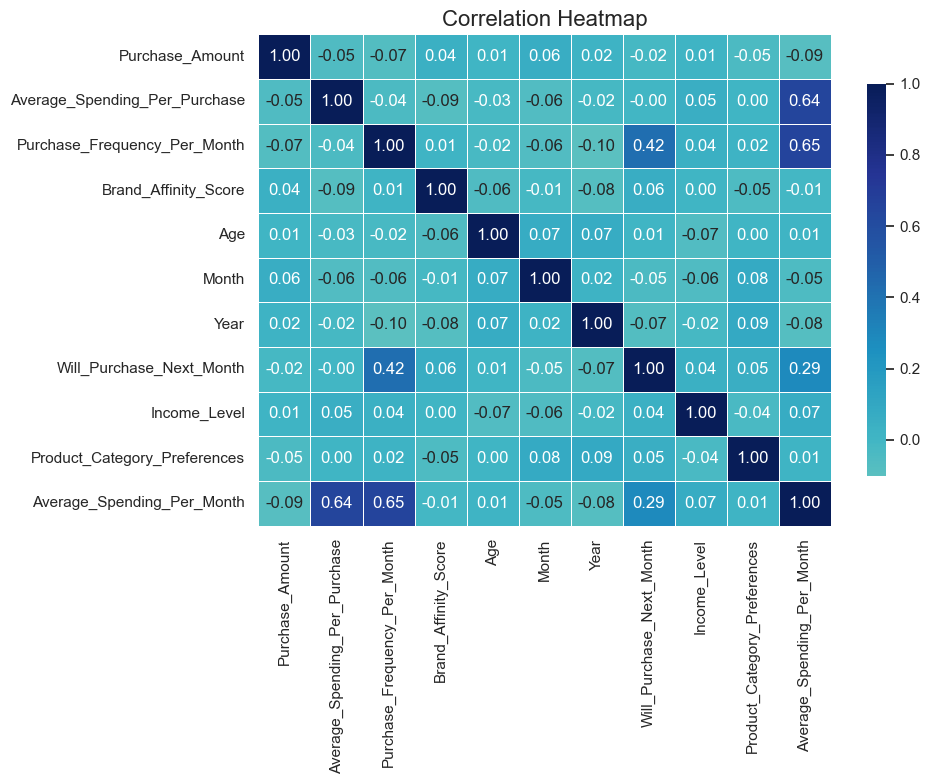

In [41]:
corr_matrix = key_df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", center=0, linewidths=0.5, fmt=".2f", 
            cbar_kws={"shrink": 0.8}, annot_kws={"size": 12})

plt.title("Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()


> #### Thoughts:
> - #### There is high correlation between monthly purchase frequency and whether someone will purchase next month or not.
> - #### Brand affinity score plays some role on whether someone will purchase next month too.
> - #### Unfortunately, the likelyhood of purchasing next month goes down monthly/yearly. Same with monthly purchase frequency and brand affinity.
***
- ### **2.2** Scatter plots. 


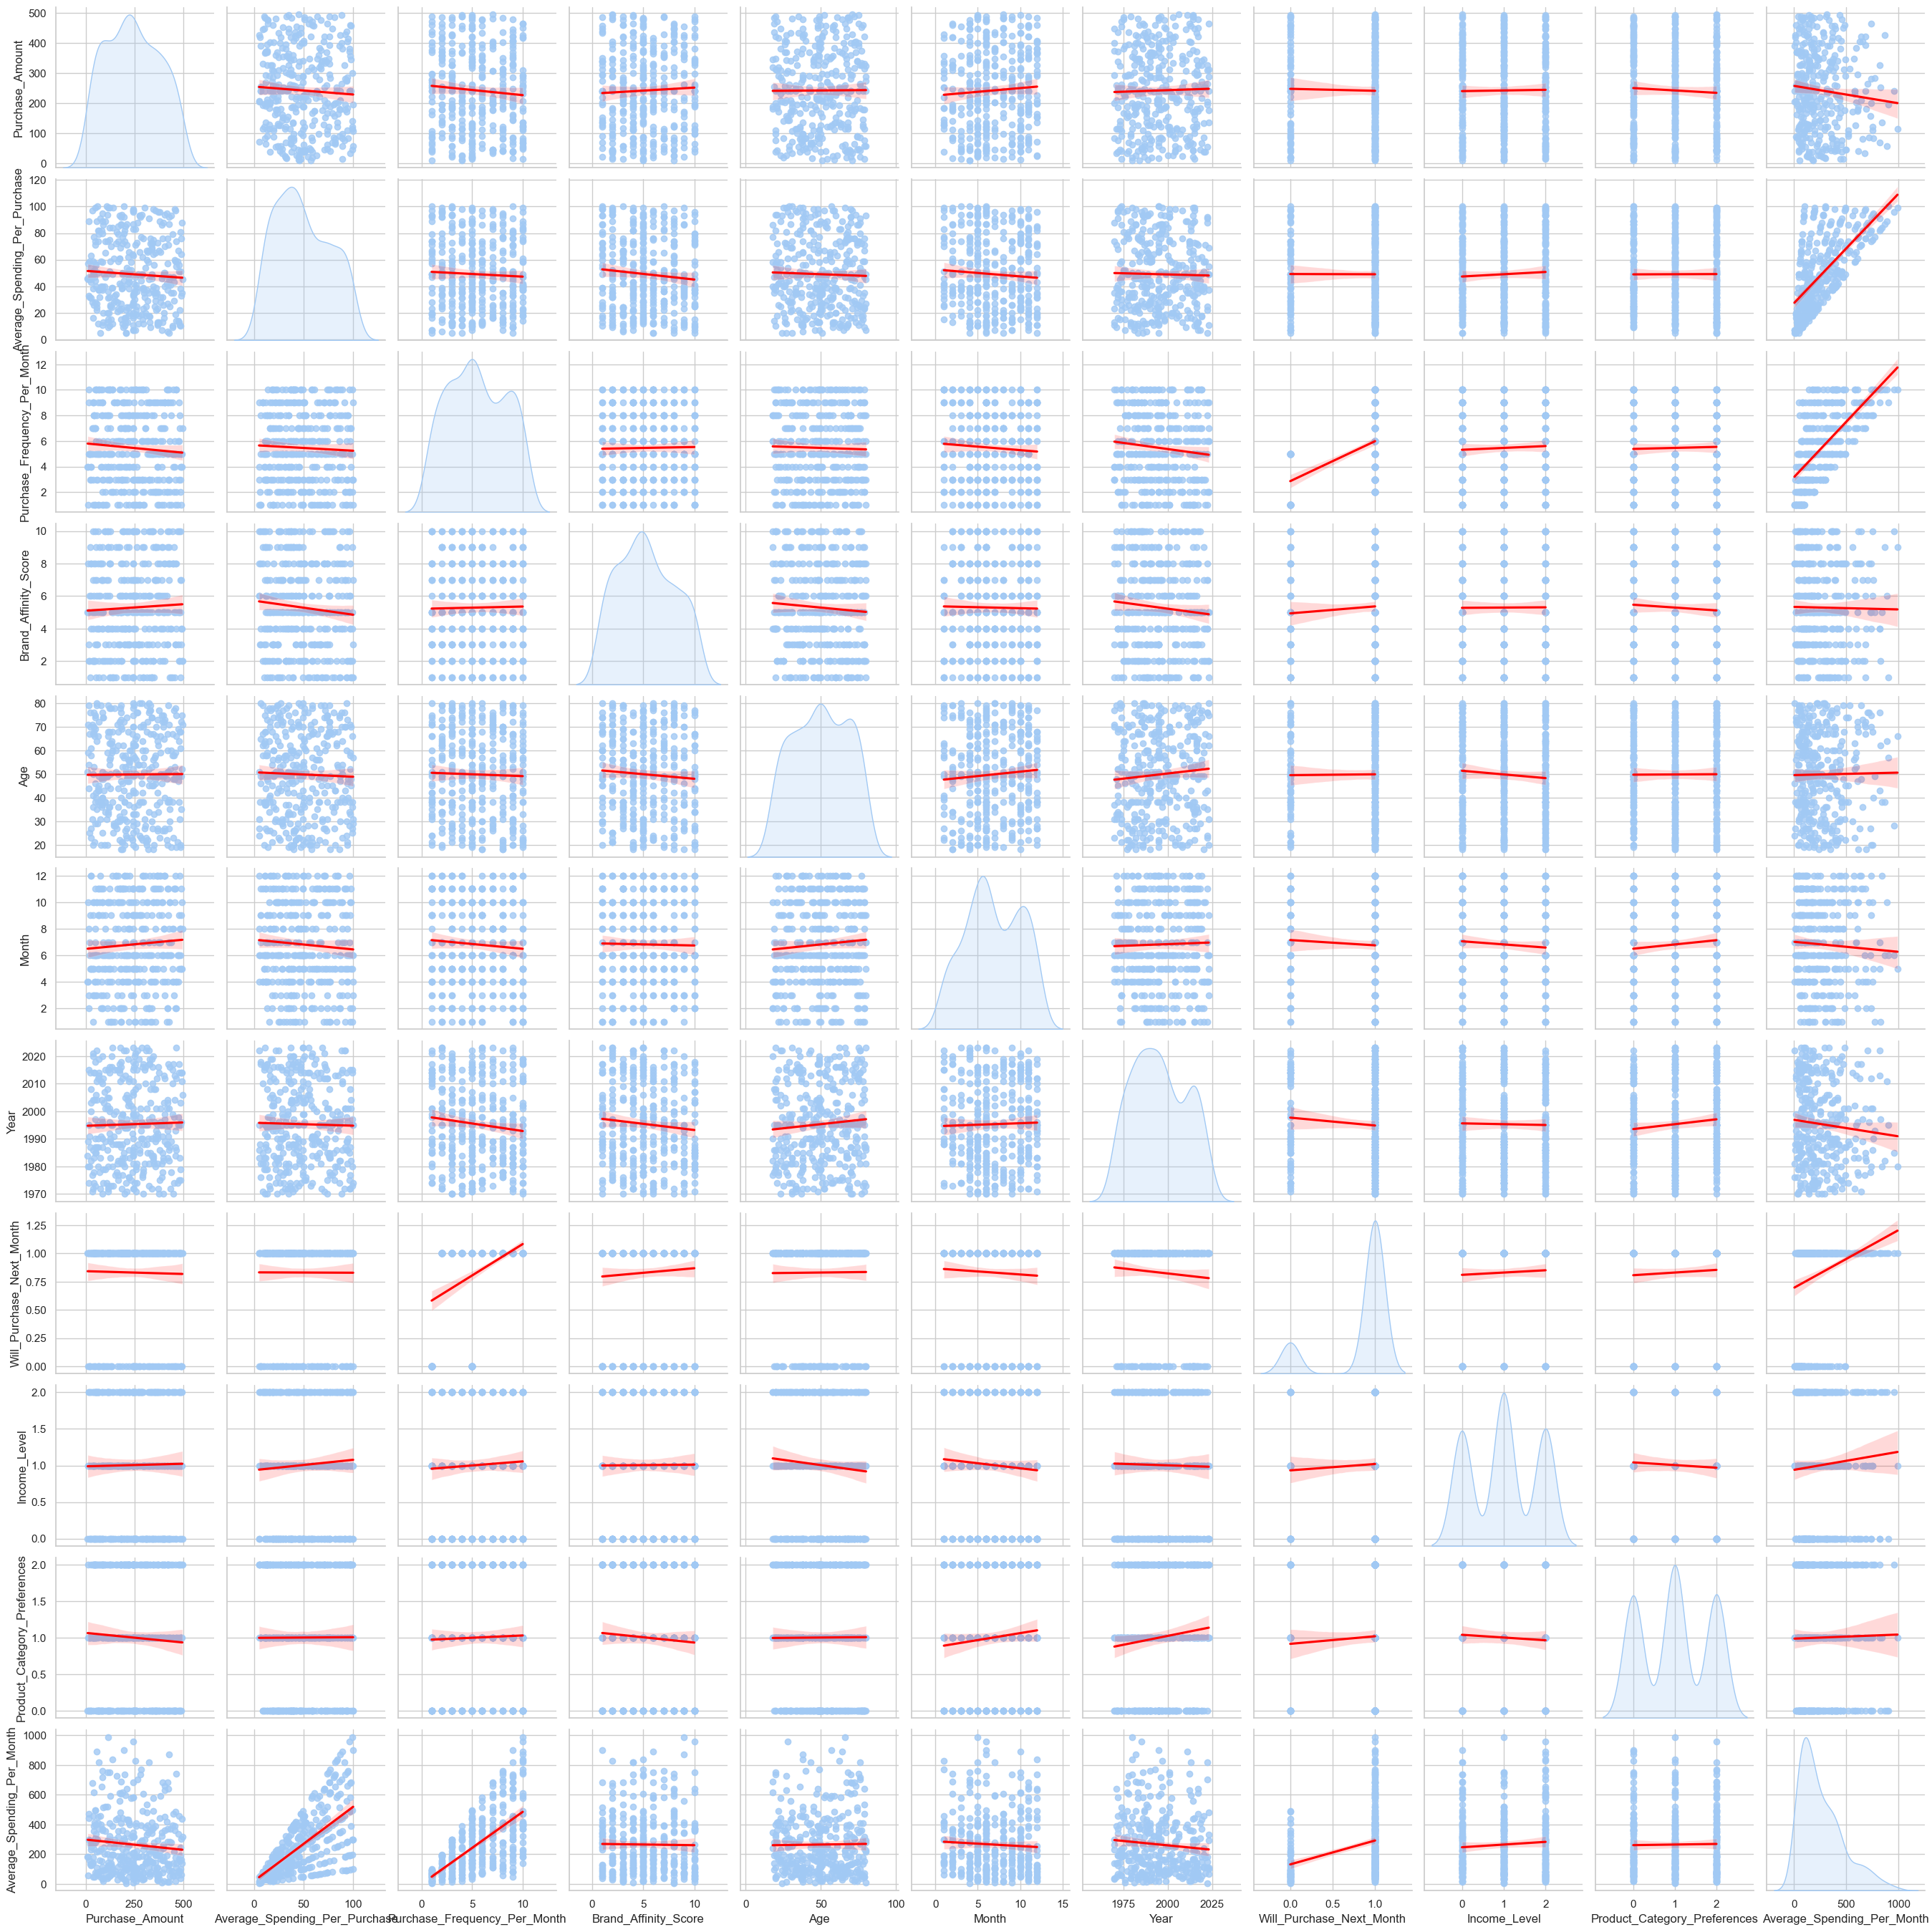

In [43]:
sns.pairplot(key_df, diag_kind='kde', kind='reg', plot_kws={'line_kws':{'color':'red'}})

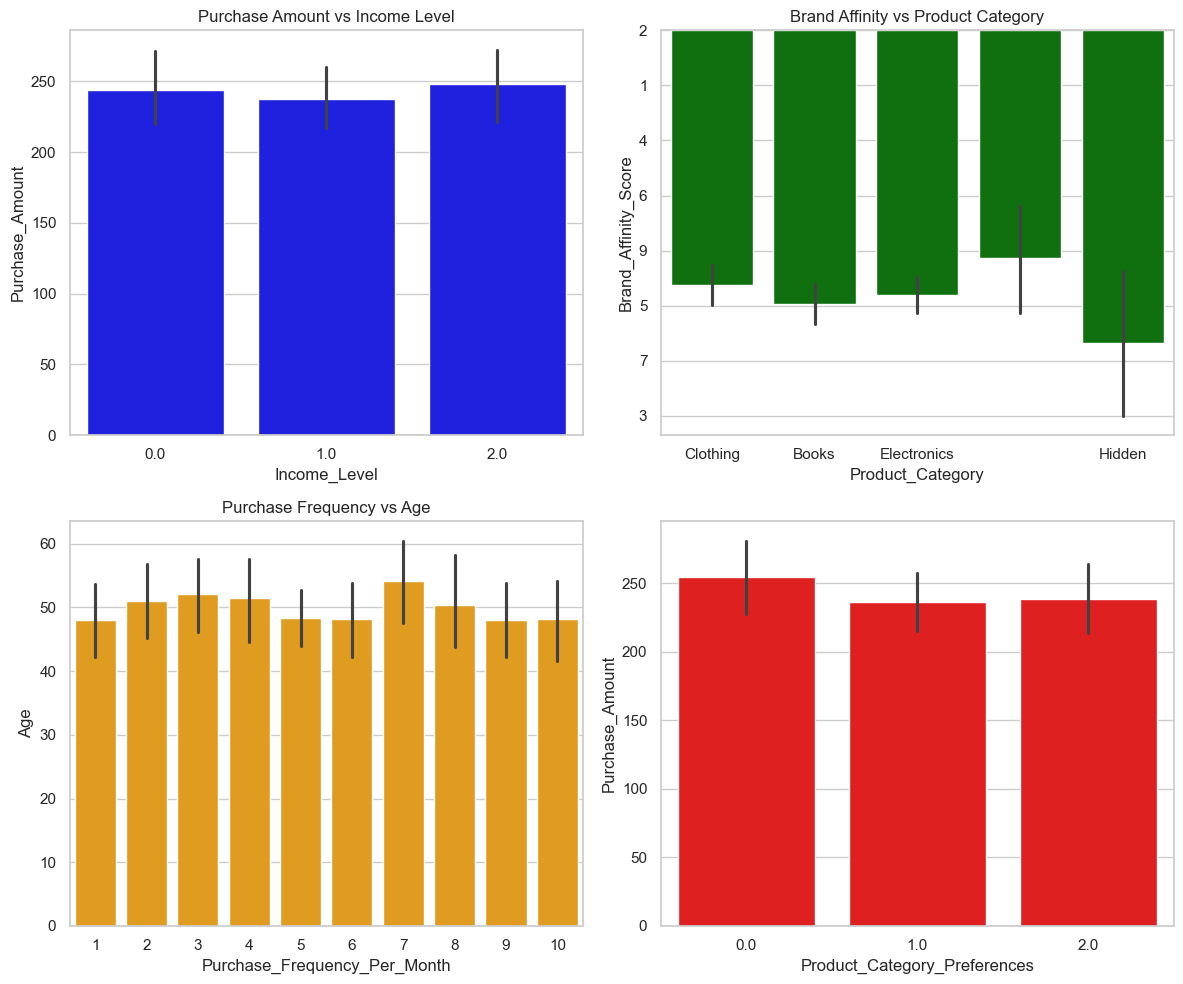

In [44]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()  

sns.barplot(y='Purchase_Amount', x='Income_Level', data=df, ax=axes[0], color='blue')
axes[0].set_title('Purchase Amount vs Income Level')

sns.barplot(y='Brand_Affinity_Score',x='Product_Category', data=df_og, ax=axes[1], color='green')
axes[1].set_title('Brand Affinity vs Product Category')

sns.barplot(x='Purchase_Frequency_Per_Month', y='Age', data=df, ax=axes[2], color='orange')
axes[2].set_title('Purchase Frequency vs Age')

sns.barplot(x='Product_Category_Preferences', y='Purchase_Amount', data=df, ax=axes[3], color='red')
axes[2].set_title('Purchase Frequency vs Age')

plt.tight_layout()
plt.show()

***
## **3. Temporal Analysis**
### **3.1** Analysing Trends.

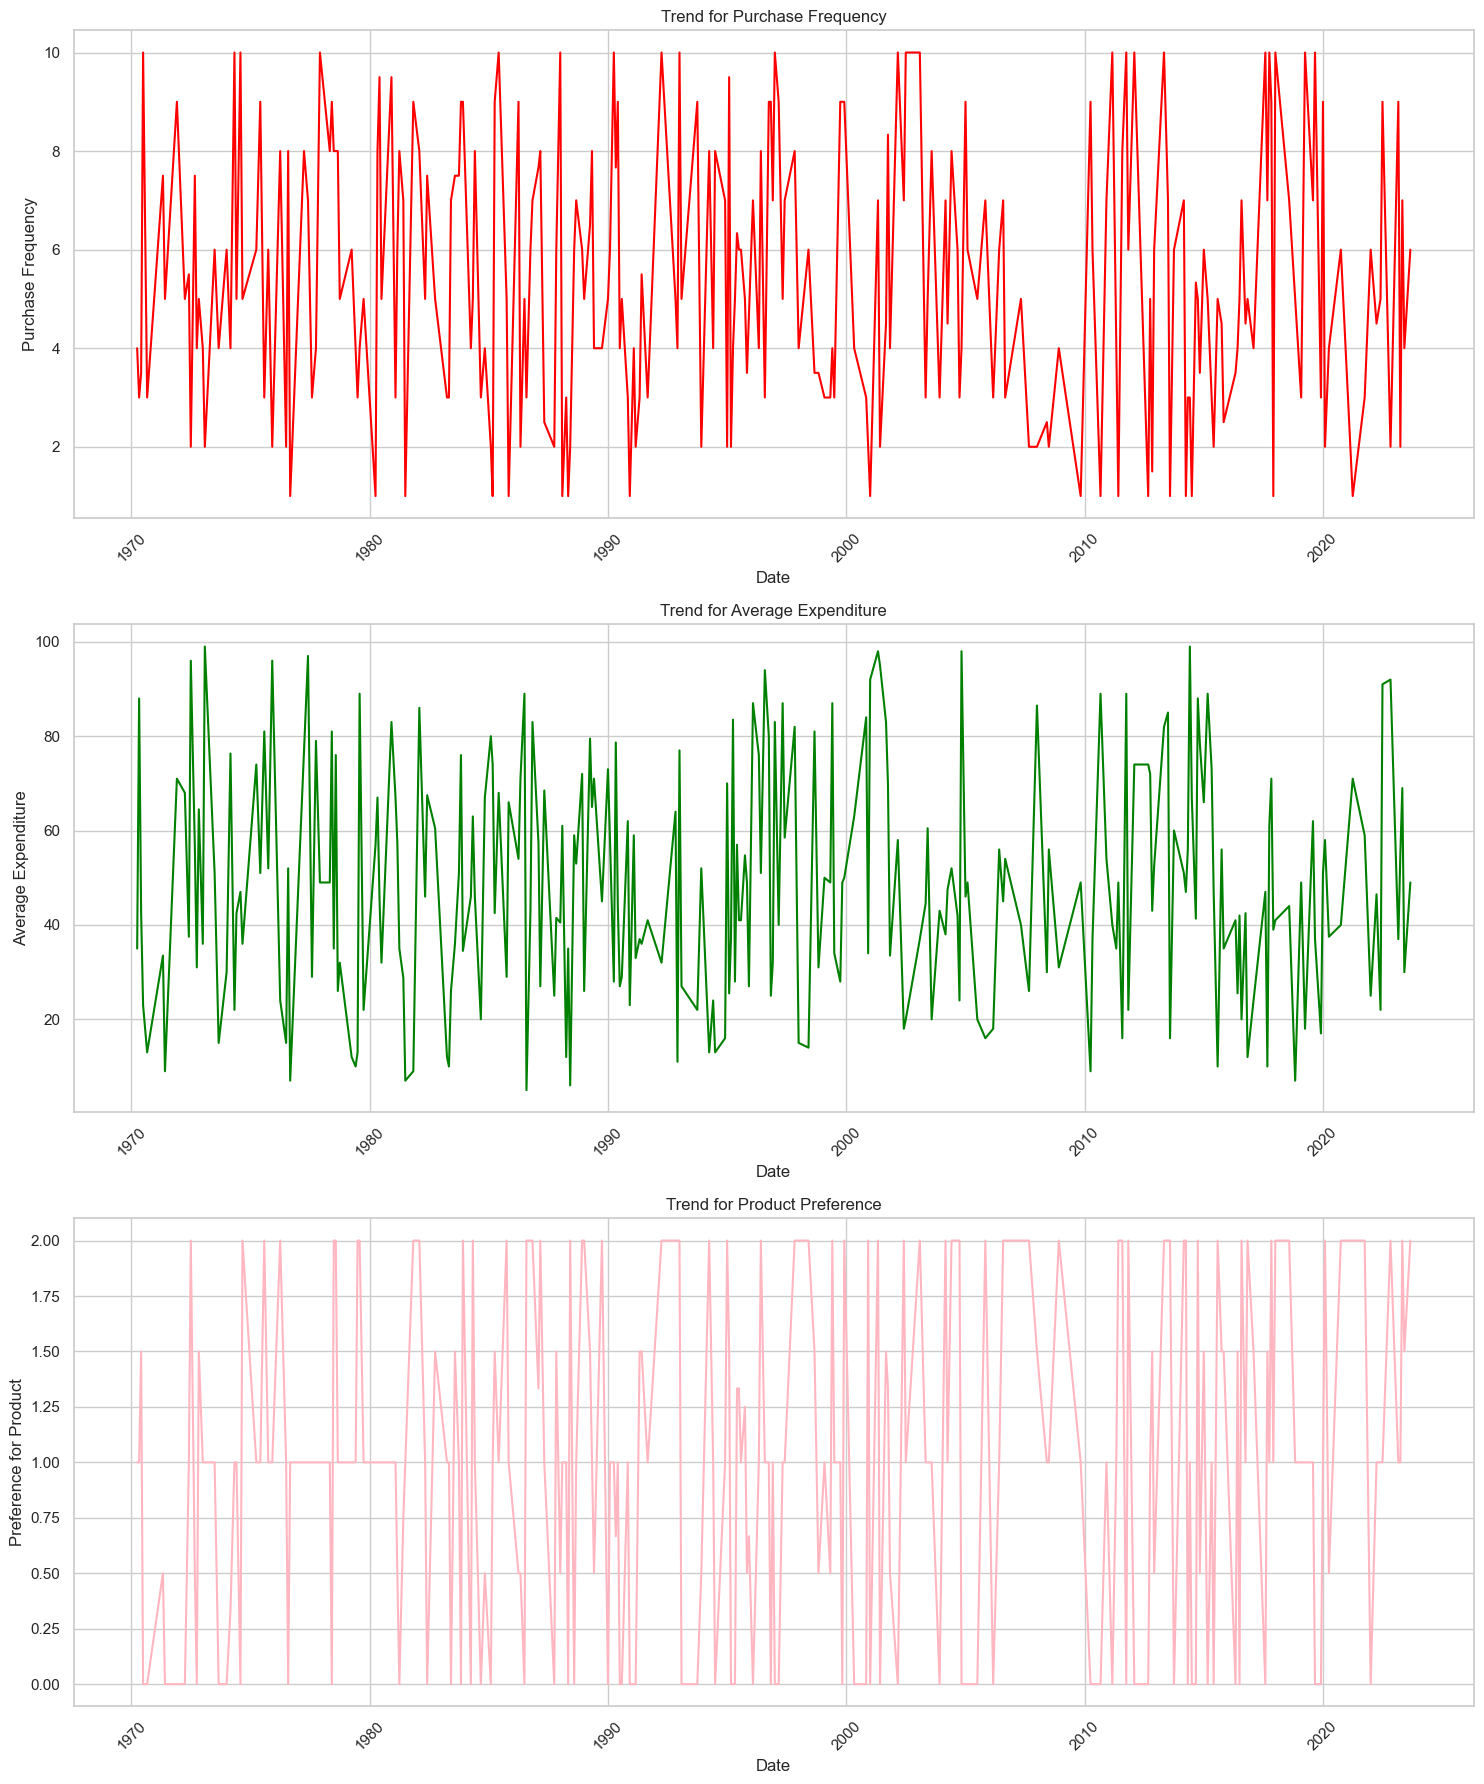

In [46]:
temporal_info = [('Purchase_Frequency_Per_Month','Trend for Purchase Frequency','red','Purchase Frequency'),
('Average_Spending_Per_Purchase','Trend for Average Expenditure','green','Average Expenditure'),                 
('Product_Category_Preferences','Trend for Product Preference','lightpink','Preference for Product')]

df['Date'] = pd.to_datetime(df[['Year','Month']].assign(Day=1))

plt.figure(figsize=(15,18))
sns.set(style='whitegrid')
for i, (column,title,col,y_ax_label) in enumerate(temporal_info,1):
    plt.subplot(3,1,i)
    sns.lineplot(x='Date',y=column,data = df.groupby('Date').agg({column:'mean'}).reset_index(),color = col)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(y_ax_label)
    plt.xticks(rotation=45)
    plt.grid(True)


plt.tight_layout()
plt.show()
    

***
## **3. Temporal Analysis**
### **3.2** Seasonal Variation.

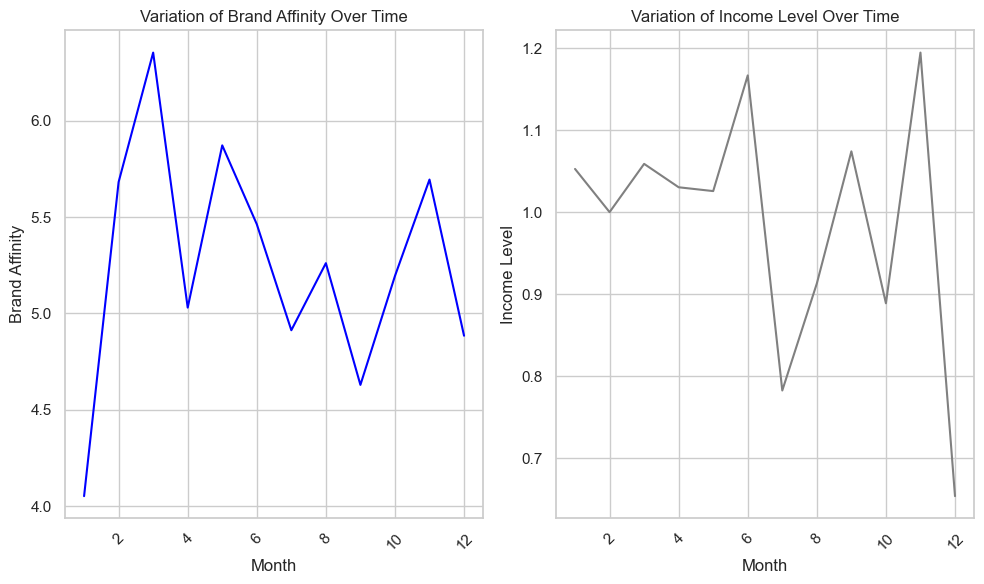

In [48]:
seasonal_cols = [('Brand_Affinity_Score','Variation of Brand Affinity Over Time','blue','Brand Affinity'),
('Income_Level','Variation of Income Level Over Time','gray','Income Level')]

df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

plt.figure(figsize=(10,6))
sns.set(style='whitegrid')
for i, (column,title,col,y_ax_label) in enumerate(seasonal_cols,1):
    plt.subplot(1,2,i)
    sns.lineplot(x='Month',y=column,data = df.groupby('Month').agg({column:'mean'}).reset_index(),color = col)
    plt.title(title)
    plt.xlabel('Month')
    plt.ylabel(y_ax_label)
    plt.xticks(rotation=45)
    plt.grid(True)


plt.tight_layout()
plt.show()


> #### Thoughts:
> - #### Seasonal relationships show the customer behaviour  pattern over months. Trend is more like a zigzag path with up and down trend over months. 
> - #### Trend of Brand Affinity Over Time shows that most affinity was in March while the least was in January.
> - #### Trend of Income Level Over Time shows that customers had the most Income level in November and least in December.


# <div style="text-align: center; padding-top: 100px;"> __MODULE 3 :__</div>
# <center>__REGRESSION:__ </center>
***
## **1. Linear Regression Analysis.**


### **1.1** Visualising dependent variable.

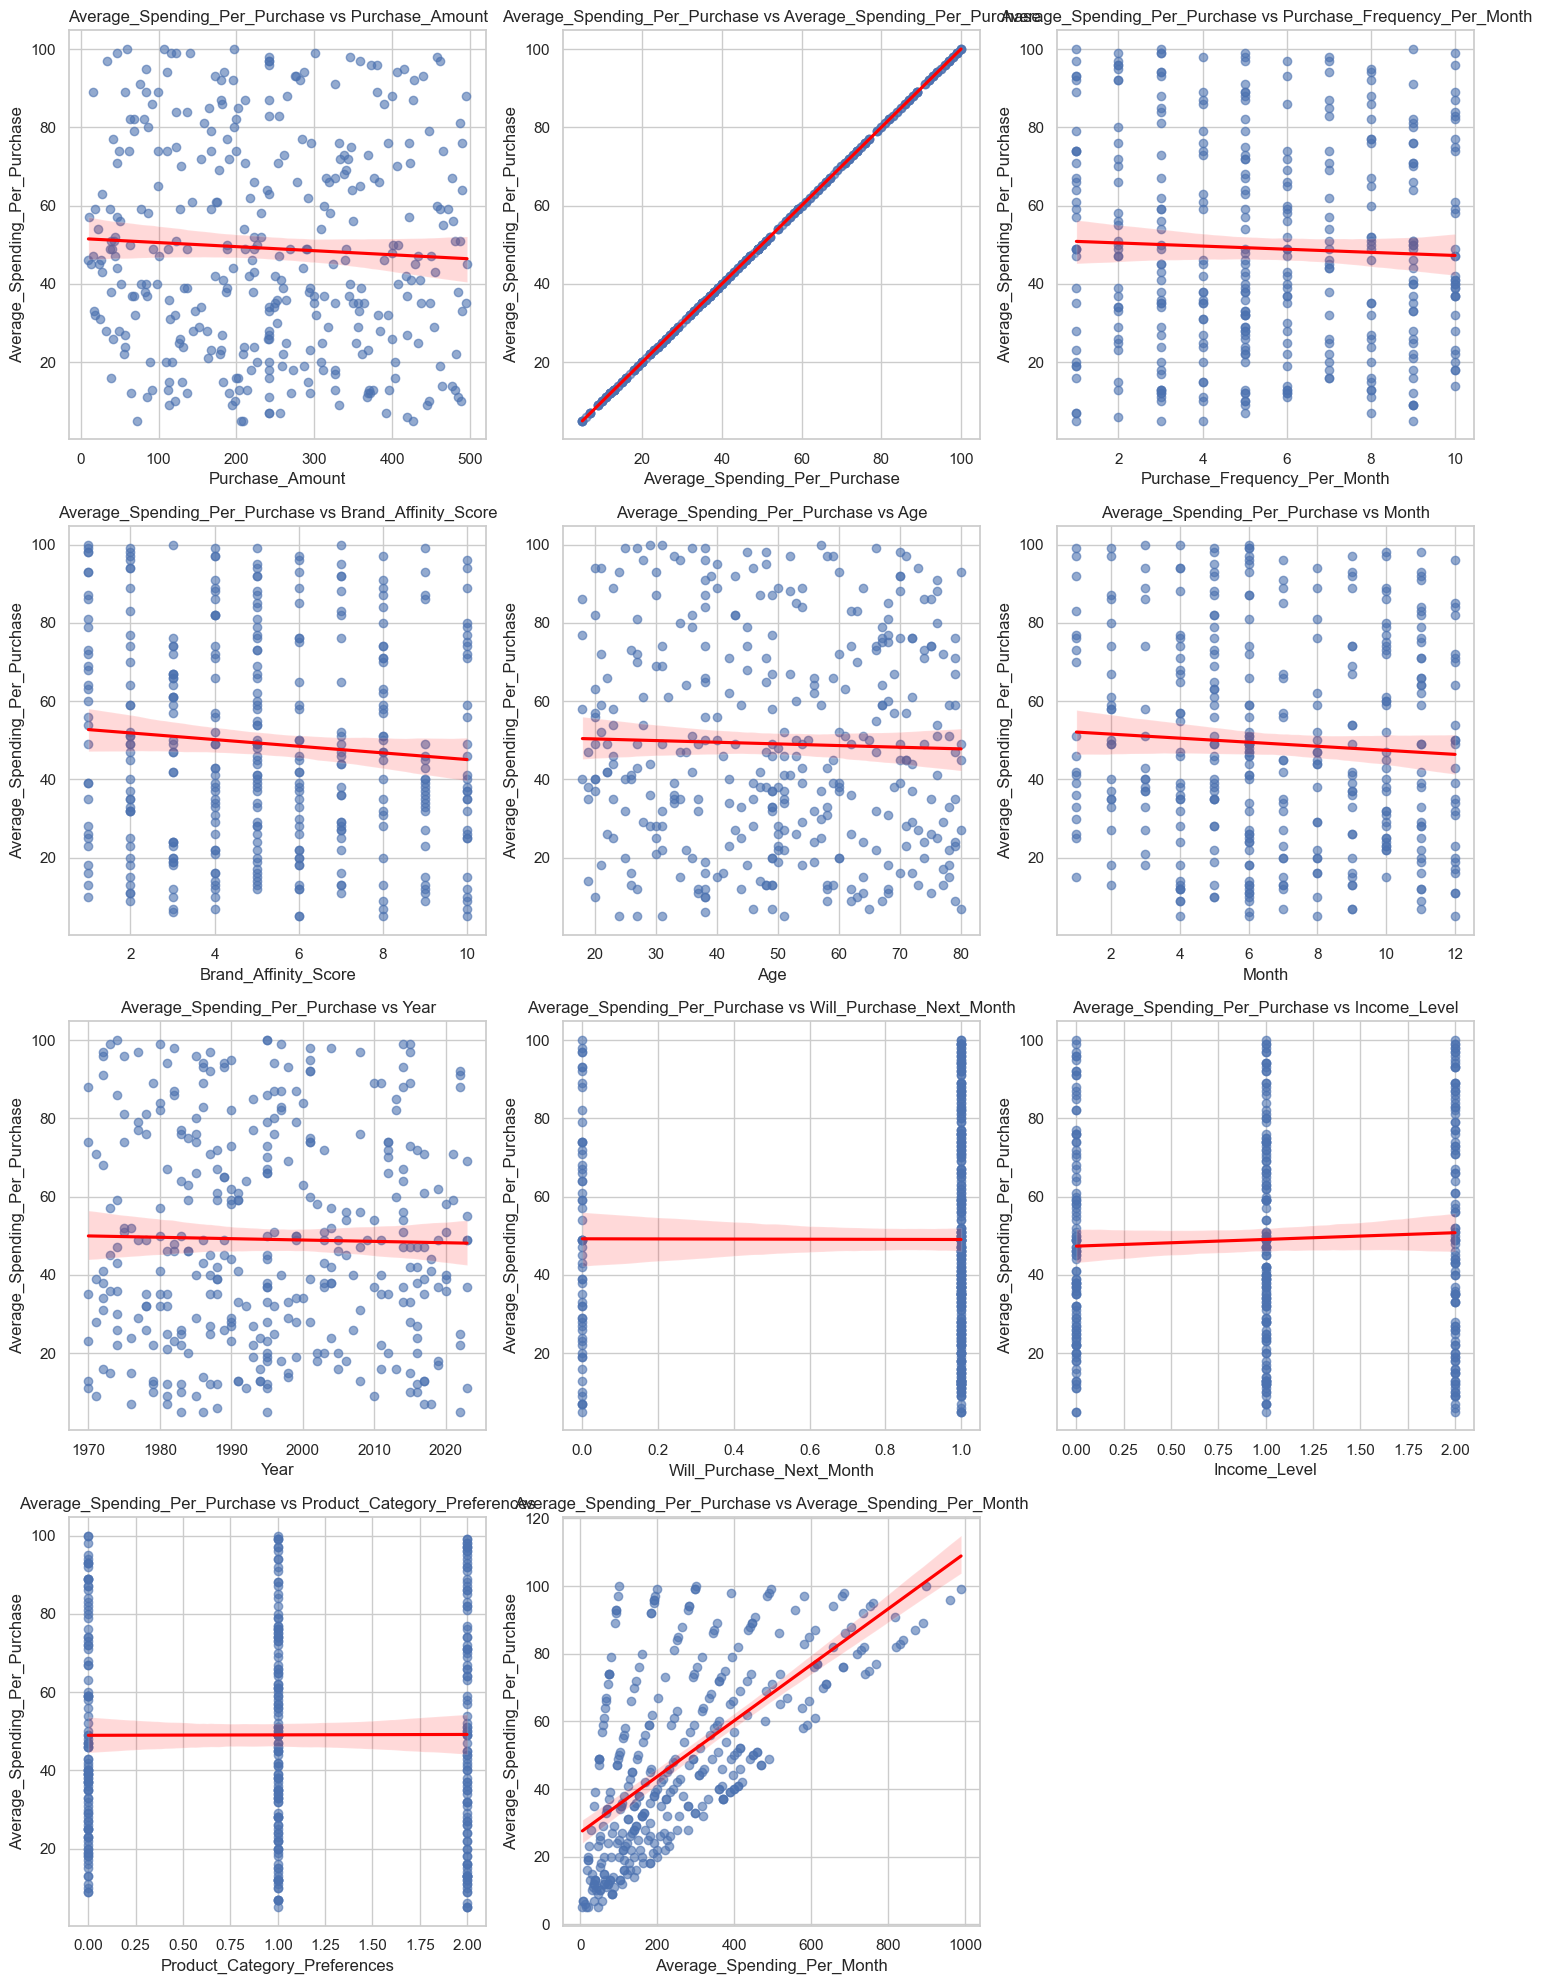

In [56]:
n_vars = len(numeric_columns)
n_rows = (n_vars + 3 - 1) // 3  

fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))
axes = axes.flatten()  

for i, column in enumerate(numeric_columns):
    sns.regplot(x=df[column], y=df['Average_Spending_Per_Purchase'], ax=axes[i], scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
    axes[i].set_title(f'Average_Spending_Per_Purchase vs {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Average_Spending_Per_Purchase')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


> #### Thoughts:
> - #### There is slim to no clustering or relations to be found other than the average spending per month.
> - #### Dependant variable seems to not depend on any other independent variables
***
- ### **2.2** Making Multilinear Regression Model. 


Mean Absolute Error (MAE): 9.244849304428092
Mean Squared Error (MSE): 168.6168081486184
Root Mean Squared Error (RMSE): 12.985253488038591

R-squared (R2): 0.7763577420443073
Adjusted R-squared: 0.753061673507256
Explained Variance Score: 0.7851536395600858
Max Error: 41.15130314008074
Training MSE: 154.96191460174293
Test MSE: 168.6168081486184
Training R²: 0.7847768877170427
Test R²: 0.7763577420443073


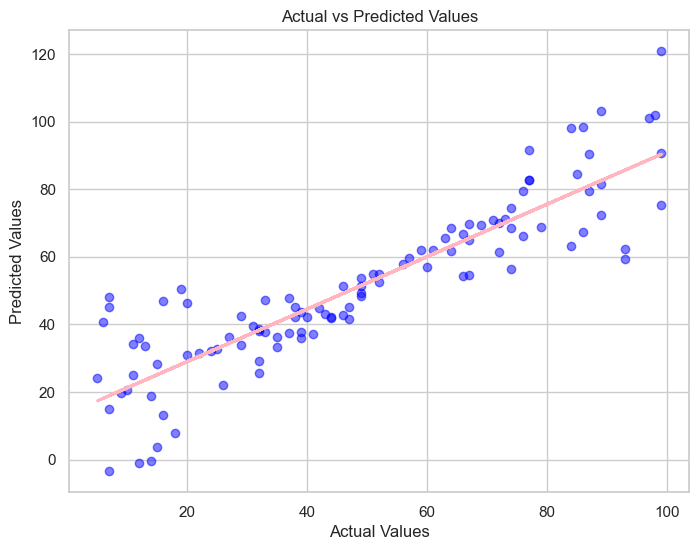

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, max_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

features = numeric_columns.copy()
features.remove('Average_Spending_Per_Purchase')
X_train, X_test, y_train, y_test = train_test_split(df[features], df['Average_Spending_Per_Purchase'], test_size=0.3, random_state=2)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)  
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)
max_err = max_error(y_test, y_pred)

n = len(y_test)  
p = X_test.shape[1]  
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print all metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print()
print("R-squared (R2):", r2)
print("Adjusted R-squared:", adjusted_r2)
print("Explained Variance Score:", explained_variance)
print("Max Error:", max_err)

y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Training R²: {train_r2}")
print(f"Test R²: {test_r2}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)

m,b = np.polyfit(y_test,y_pred,1)
plt.plot(y_test, m*y_test + b , color='lightpink',linewidth=2)
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

> #### Thoughts:
> - #### The model shows highly positive R squared value. A majority of the variance is explained.
> - #### Much of the variance is explained by the feature engineered average monthly spending. In practice, the multicollinearity between the two variables skews the results. It does not perform well otherwise.
***
## **2. Decision Tree  Analysis.**


Accuracy: 0.9626168224299065

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        21
           1       0.97      0.99      0.98        86

    accuracy                           0.96       107
   macro avg       0.96      0.92      0.94       107
weighted avg       0.96      0.96      0.96       107


Confusion Matrix:
[[18  3]
 [ 1 85]]


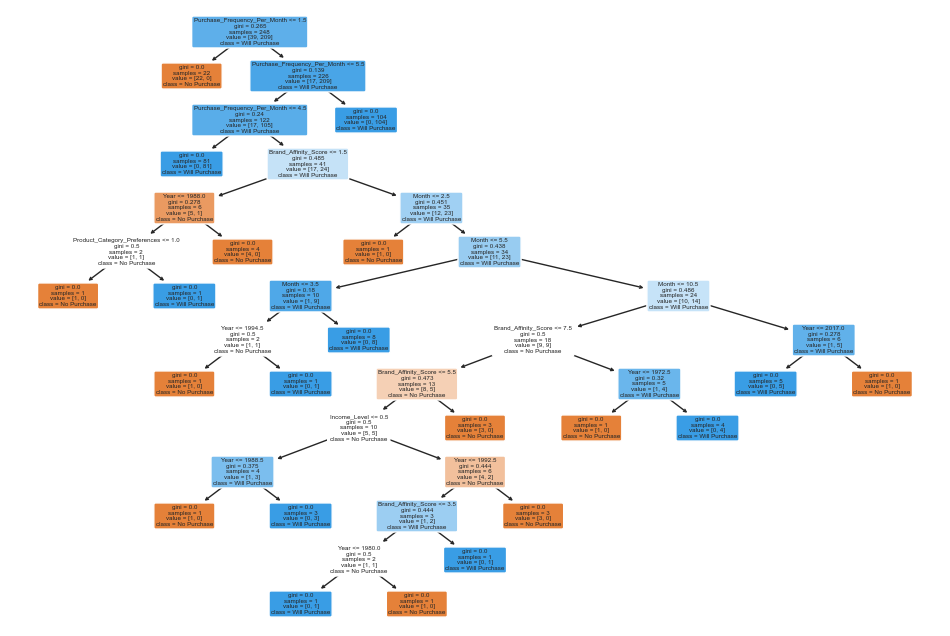

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree

features = ['Purchase_Frequency_Per_Month', 'Brand_Affinity_Score', 'Income_Level', 'Product_Category_Preferences', 'Month', 'Year']
target = 'Will_Purchase_Next_Month'  

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


plt.figure(figsize=(12,8))
plot_tree(dt_model, filled=True, feature_names=features, class_names=['No Purchase', 'Will Purchase'], rounded=True)
plt.show()


> #### Thoughts:
> - #### The model shows high prediction accuracy.
> - #### The model has very few false positives and true negatives. Also shows great predictive properties
# <div style="text-align: center; padding-top: 100px;"> __MODULE 4 :__</div>
# <center>__CLUSTERING ANALYSIS:__ </center>

***
## **1. K Mean  Analysis.**

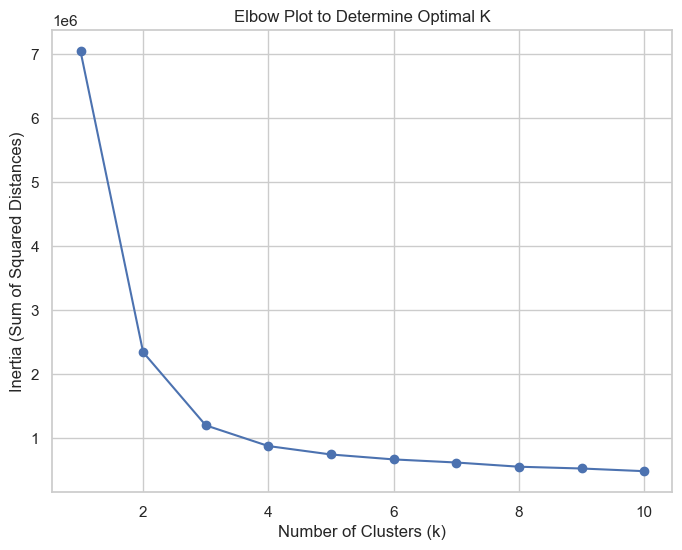

In [103]:
from sklearn.cluster import KMeans
features = ['Purchase_Amount', 'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score', 'Product_Category_Preferences', 'Average_Spending_Per_Purchase']
key_df.drop(columns='Average_Spending_Per_Month', inplace=True)  # 
numeric_columns.remove('Average_Spending_Per_Month')
inertia = []  
k_range = range(1, 11) 

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', color='b')
plt.title('Elbow Plot to Determine Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.show()

> #### Thoughts:
> - #### Elbow plot seems to converge around 2 clusters.
***
## **2. Cluster Characterization.**

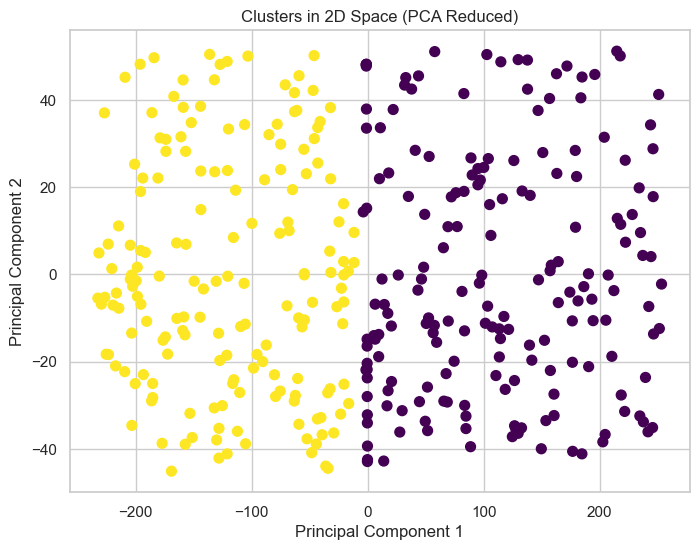

In [105]:
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=2, random_state=42)
key_df['Cluster'] = kmeans.fit_predict(X)
cluster1 = key_df[key_df['Cluster'] == 0]
cluster2 = key_df[key_df['Cluster'] == 1]
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=key_df['Cluster'], cmap='viridis', s=50)
plt.title('Clusters in 2D Space (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

> #### Thoughts:
> - #### The dataset is divided into two clusters. Further analysis is necessary.
***

## **2. Cluster Analysis.**

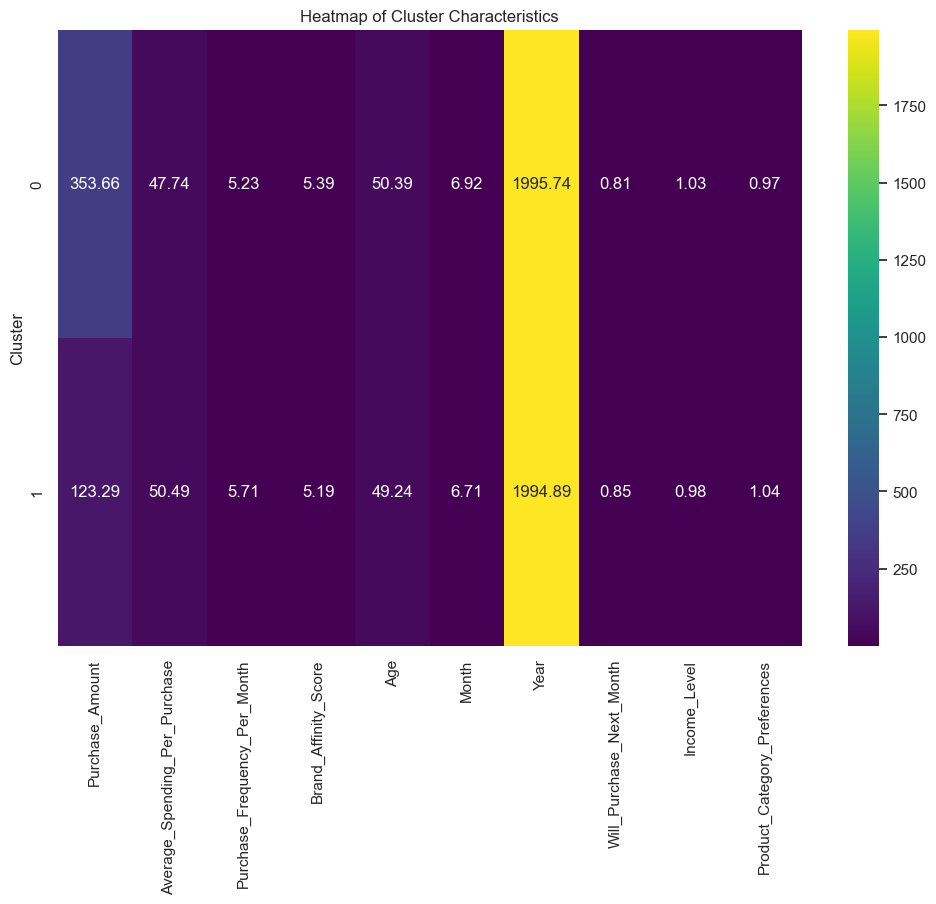

In [107]:
import seaborn as sns

cluster_summary = key_df.groupby('Cluster')[numeric_columns].mean()

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_summary, annot=True, cmap='viridis', fmt='.2f')
plt.title('Heatmap of Cluster Characteristics')
plt.show()


In [109]:
cluster1.describe()

Purchase_Amount  Average_Spending_Per_Purchase  \
count       184.000000                     184.000000   
mean        353.657609                      47.744565   
std          79.206634                      27.484024   
min         239.000000                       5.000000   
25%         286.750000                      25.000000   
50%         348.500000                      42.000000   
75%         419.750000                      70.250000   
max         496.000000                      99.000000   

       Purchase_Frequency_Per_Month  Brand_Affinity_Score         Age  \
count                    184.000000            184.000000  184.000000   
mean                       5.233696              5.385870   50.391304   
std                        2.819672              2.795003   18.625710   
min                        1.000000              1.000000   18.000000   
25%                        3.000000              3.000000   34.750000   
50%                        5.000000              5.000000   50.000000   
75%                        8.000000              8.000000   67.000000   
max                       10.000000             10.000000   80.000000   

            Month         Year  Will_Purchase_Next_Month  Income_Level  \
count  184.000000   184.000000                184.000000    184.000000   
mean     6.923913  1995.739130                  0.809783      1.027174   
std      3.207688    14.965804                  0.393543      0.799126   
min      1.000000  1970.000000                  0.000000      0.000000   
25%      5.000000  1984.000000                  1.000000      0.000000   
50%      7.000000  1995.000000                  1.000000      1.000000   
75%     10.000000  2009.250000                  1.000000      2.000000   
max     12.000000  2023.000000                  1.000000      2.000000   

       Product_Category_Preferences  Cluster  
count                    184.000000    184.0  
mean                       0.967391      0.0  
std                        0.795494      0.0  
min                        0.000000      0.0  
25%                        0.000000      0.0  
50%                        1.000000      0.0  
75%                        2.000000      0.0  
max                        2.000000      0.0

In [110]:
cluster2.describe()

Purchase_Amount  Average_Spending_Per_Purchase  \
count       171.000000                     171.000000   
mean        123.292398                      50.491228   
std          65.793142                      26.606582   
min          10.000000                       5.000000   
25%          64.500000                      28.000000   
50%         122.000000                      49.000000   
75%         183.500000                      74.000000   
max         231.000000                     100.000000   

       Purchase_Frequency_Per_Month  Brand_Affinity_Score         Age  \
count                    171.000000            171.000000  171.000000   
mean                       5.713450              5.187135   49.239766   
std                        2.791752              2.656858   17.574575   
min                        1.000000              1.000000   18.000000   
25%                        3.500000              3.000000   36.000000   
50%                        5.000000              5.000000   49.000000   
75%                        8.000000              7.000000   64.000000   
max                       10.000000             10.000000   80.000000   

            Month         Year  Will_Purchase_Next_Month  Income_Level  \
count  171.000000   171.000000                171.000000    171.000000   
mean     6.707602  1994.894737                  0.853801      0.982456   
std      3.249778    15.030578                  0.354343      0.755168   
min      1.000000  1970.000000                  0.000000      0.000000   
25%      4.000000  1982.500000                  1.000000      0.000000   
50%      6.000000  1995.000000                  1.000000      1.000000   
75%     10.000000  2006.500000                  1.000000      2.000000   
max     12.000000  2023.000000                  1.000000      2.000000   

       Product_Category_Preferences  Cluster  
count                    171.000000    171.0  
mean                       1.040936      1.0  
std                        0.777301      0.0  
min                        0.000000      1.0  
25%                        0.000000      1.0  
50%                        1.000000      1.0  
75%                        2.000000      1.0  
max                        2.000000      1.0

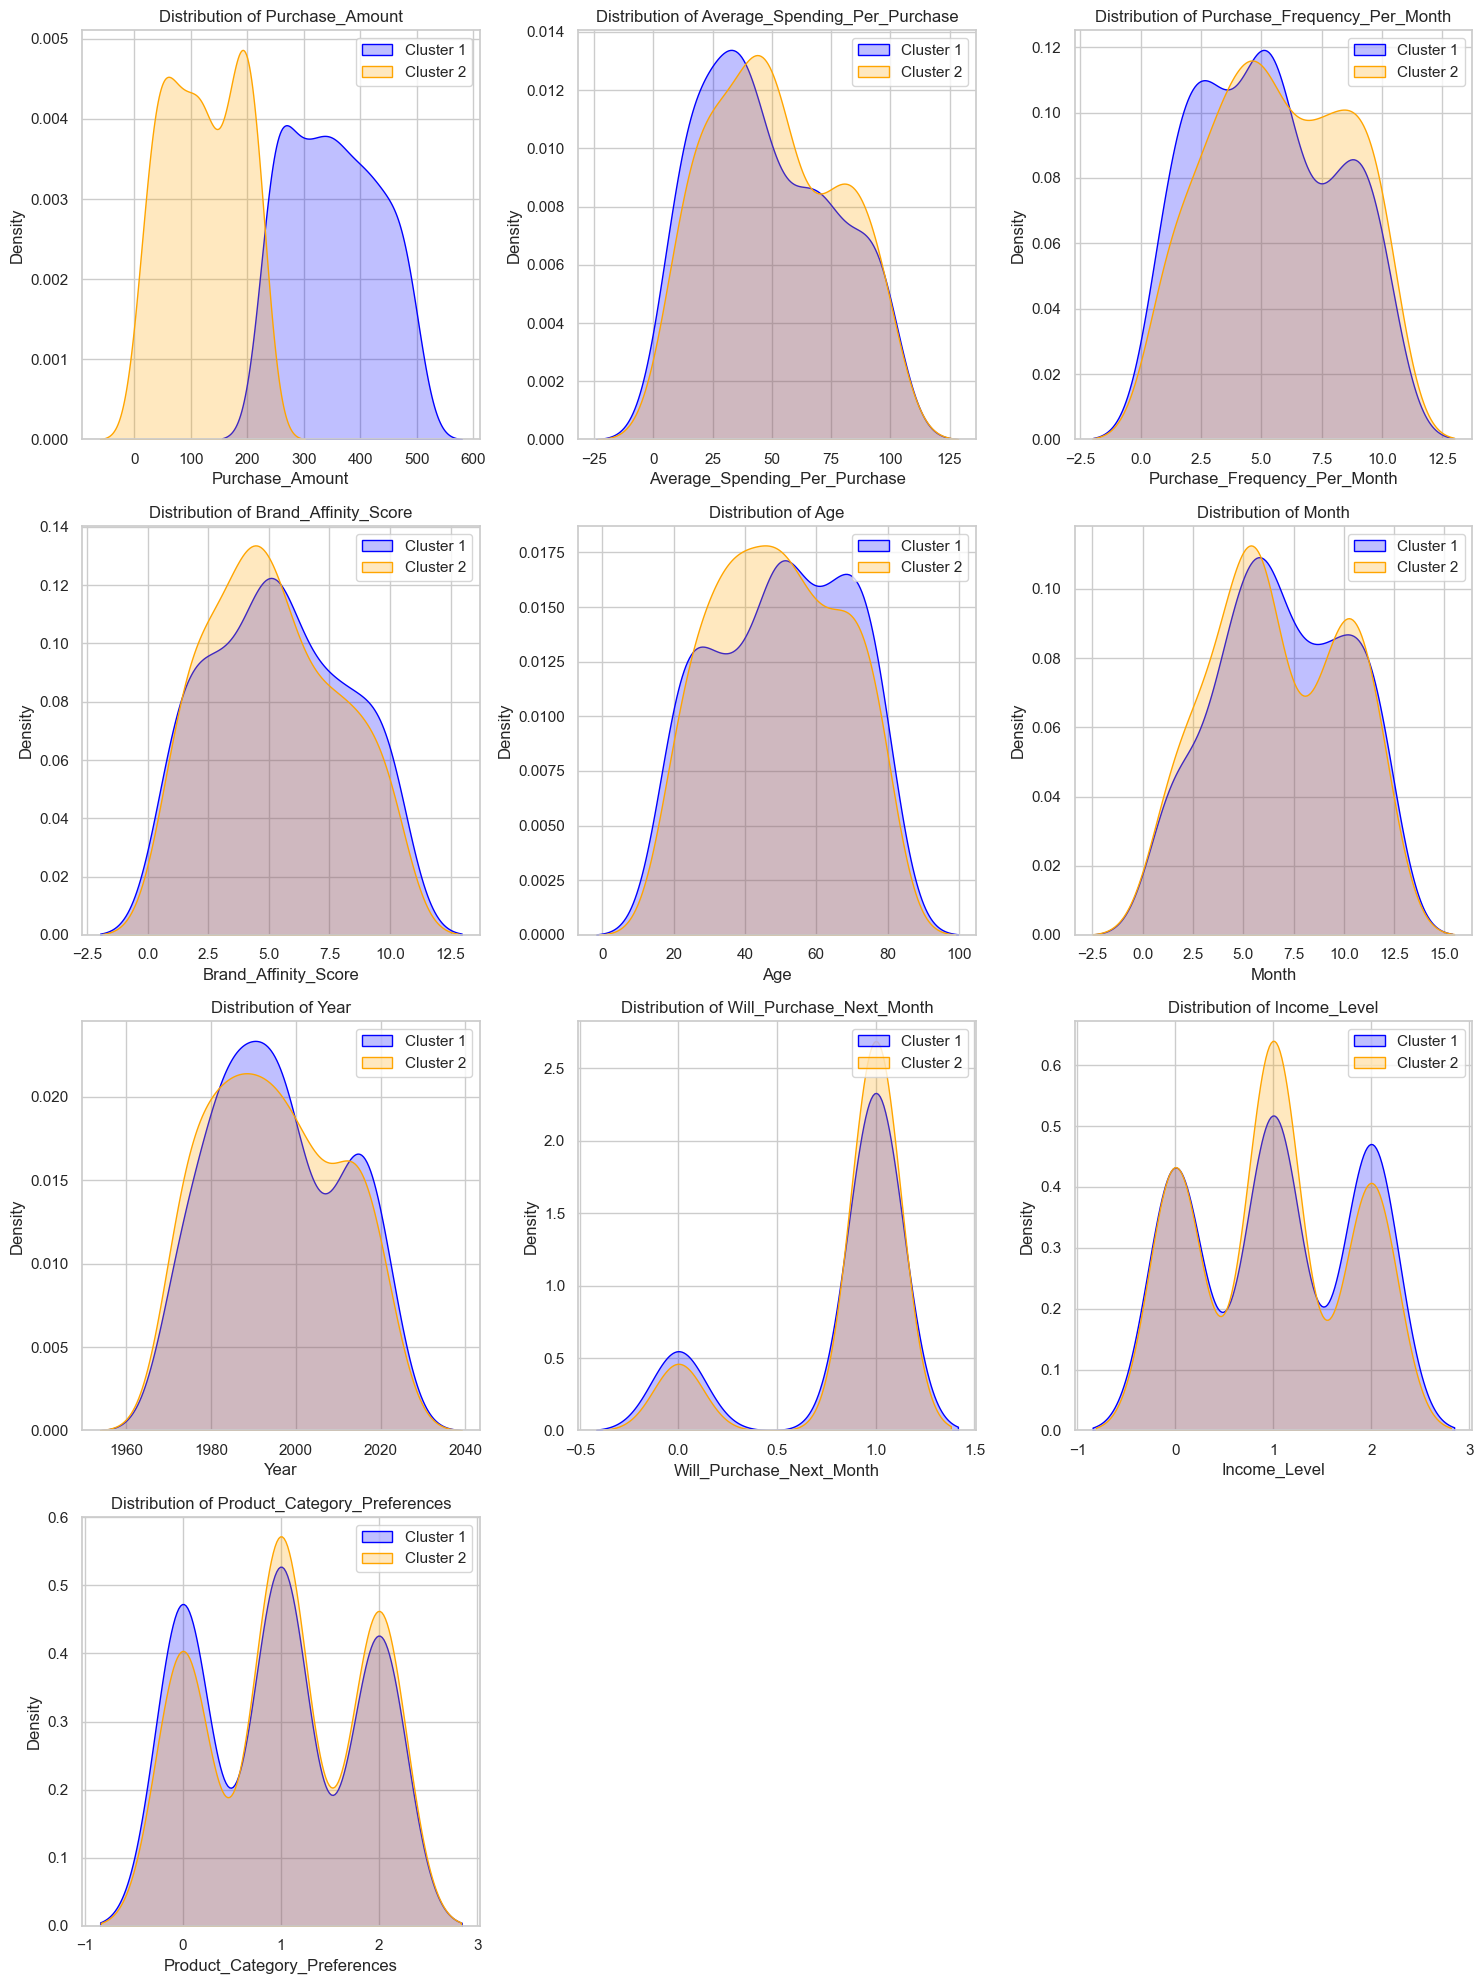

In [111]:
n_cols = 3  
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  

for i, column in enumerate(numeric_columns):
    sns.kdeplot(cluster1[column], ax=axes[i], label='Cluster 1', shade=True, color='blue')
    sns.kdeplot(cluster2[column], ax=axes[i], label='Cluster 2', shade=True, color='orange')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')
    axes[i].legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


> #### Thoughts:
> - #### Cluster 1 spends alot more as compared to cluster 2.
> - #### Cluster 1 has more people of age 50+ as compared to cluster 2. Cluster 1 also has alot more purchases before the year 2000. This shows a preference of the elderly to spend more.
> - #### Customers of older demographics consist of a majority of the well paying customers. More focus should be placed on this demographic.

# <div style="text-align: center; padding-top: 100px;"> __MODULE 5:__</div>
# <center>__COMPARISON AND CONCLUSION:__ </center>
***
## **1. Predictive Performance of Different Models.**


- ## **A)** Linear Regression Model Performance 
> ### Thoughts: 
>1. #### R^2 Score = 0.0017(Very Low) 
>2. #### Adjusted R^2 : -0.0019(Negative,Indicating poor fit)
>3. #### MAE : 21.17
>4. #### MSE : 694.86
>5. #### RMSE: 26.36
>6. #### Cross Validation: -0.0256(indicating poor generalization)

> The regresson model shows a  poor fit, with a very low R^2 score and negative adjusted R^2 , indicating that it doesn't explain the variance in target variable at all.

> ### Strengths: 
>1. #### Easy to understand
>2. #### Interpretable
>3. #### Efficient for Small datasets with linear relationships


> ### Limitations:
>1. #### Poor performance in datasets where relation between predictors and target variable is non-linear
>2. #### No multicollinearity among features 


> ### Real-World Appplication:
>1. #### Not effective for customer behaviour analysis , when the relations are non-linear.


- ## **B)** Decision Tree Model Performance 
> ### Thoughts: 
>1. #### Accuracy = 96.26
>2. #### Precision and Recall = High for Class 1 (Will Purchase), Moderate for Class 0 (No Purchase)
>3. #### Confusion Matrix = High true positives for class 1, low false negatives for class 0 
>4. ####  Classification Report = Excellent precision and recall for prediciting purchase behaviour.

> The decision tree model performs well in terms of accuracy and classification metrics, showing its ability to capture patterns in customer behaviour effectively.


> #### Strengths: 
>1. ####  High Accuracy in prediciting whether a customer will purchase product next month.
>2. ####  Handles both numerical and categorical data well.


> #### Limitations:
>1. ####  Prone to overfitting,especially when tree is too deep.


> #### Real-World Appplication:
>1. #### Very useful in prediciting binary outcomes like whether a customer will purchase product next month. Brilliant for marketing strategization.


- ## **C)** K Means Clustering Model Performance 
> ### Thoughts: 
>1. #### Clusters = 2 Cluster idenitified as optimal
>2. #### Cluster Characterization = Each cluster shows distinct average characterisitics based on features like income level, brand affinity etc.
>3. #### Inertia = Shows decline with increasing k ,with elbow being at k = 2 which is also the optimal number of clusters.

> ### Strengths: 
>1. #### Useful in discovering hidden patterns in customer behaviour without needing labeled data.
>2. #### Can discover customer segments with similar behaviours helping in discovering trends.



> ### Limitations:
>1. #### Sensitive to initial placement of centroids.




> ### Real-World Appplication:
>1. #### Helpful in uncovering trends in purchasing behaviour.


***
# **2. Recommendations.**

# Key points:
> ### 1. Older demographics have a higher likelyhood of purchasing more. Priority should be given to these elders.
> ### 2. Customers who have been with Imtiaz Mall since before 2000 have a higher chance of buying more. Loyalty bonuses should be introduced to improve incentive to buy from Imtiaz Mall.
> ### 3. Bonuses for streaks of monthly purchases should be introduced to improve incentive to keep buying every month.